In [2]:
import pandas as pd
import sklearn
import plotly
import scipy
import sympy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_name = ['age' , 'workclass' , 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','result']
df = pd.read_csv(url, sep=' ', header = None, names= col_name)

In [25]:
from sklearn.metrics import precision_score

In [29]:
df.drop(['capital-gain'],axis=1,inplace=True)
df.drop(['capital-loss'],axis=1,inplace=True)
df.drop(['fnlwgt'],axis=1,inplace=True)

KeyError: "['capital-gain'] not found in axis"

In [30]:
import category_encoders as ce
#Drop target feature
X = df.drop(columns='result') 
#Encode categorical features
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)
 
y = df['result'].replace({'<=50K':0, '>50K':1})
print('Feature matrix size:',X.shape)
print('Target vector size:',len(y))

Feature matrix size: (32561, 285)
Target vector size: 32561


In [31]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (26048, 285)
Training target vector size: (26048,)
Test feature matrix size: (6513, 285)
Test target vector size: (6513,)


In [32]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
result            0
dtype: int64

In [33]:
import numpy as np
df = df.replace({'?':np.NaN})
print(df.isna().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
result            0
dtype: int64


In [34]:
df['result'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: result, dtype: float64

In [35]:
majority_class = y_train.mode()[0]
baseline_predictions = [majority_class] * len(y_train)


In [36]:
from sklearn.metrics import accuracy_score
majority_class_accuracy = accuracy_score(baseline_predictions,
                                         y_train)
print(majority_class_accuracy)


0.7591753685503686


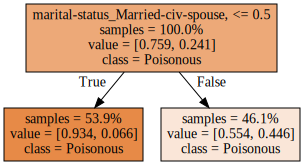

In [37]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(max_depth=1)
# Fit the model
tree.fit(X_train, y_train)
# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, class_names=['Poisonous', 'Edible'], filled=True, impurity=False, proportion=True)
graphviz.Source(dot_data)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
def model_analysis(model, train_X, train_y):
  model_probabilities = model.predict_proba(train_X)
  Model_Prediction_Probability = []
  for _ in range(len(train_X)):
      x = max(model_probabilities[_])
      Model_Prediction_Probability.append(x)
  plt.figure(figsize=(15,10)) 
 
  sns.distplot(Model_Prediction_Probability)
  plt.title('Best Model Prediction Probabilities')
  # Set x and y ticks
  plt.xticks(color='gray')
  #plt.xlim(.5,1)
  plt.yticks(color='gray')
  # Create axes object with plt. get current axes
  ax = plt.gca()
  # Set grid lines
  ax.grid(b=True, which='major', axis='y', color='black', alpha=.2)
  # Set facecolor
  ax.set_facecolor('white')
  # Remove box
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(color='white')
  plt.show();
  
  model_predictions = model.predict(train_X)
  # Classification Report
  print('\n\n', classification_report(train_y, model_predictions, target_names=['0-Poisonous', '1-Edible']))
  # Confusion Matrix
  con_matrix = pd.DataFrame(confusion_matrix(train_y, model_predictions), columns=['Predicted Poison', 'Predicted Edible'], index=['Actual Poison', 'Actual Edible'])
  
  plt.figure(figsize=(15,10))
  sns.heatmap(data=con_matrix, cmap='cool');
  plt.title('Model Confusion Matrix')
  plt.show();
  
  return con_matrix

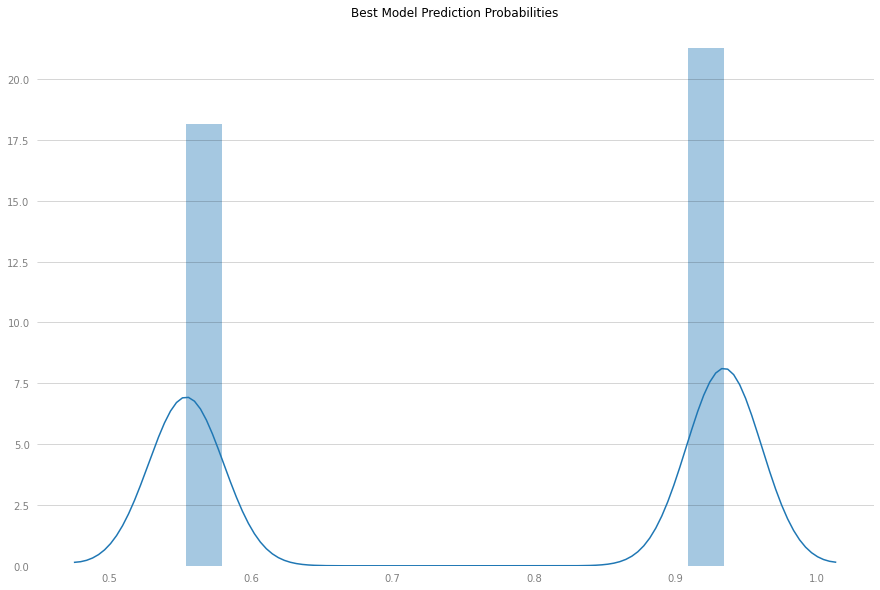

D:\spyder\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\spyder\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\spyder\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




               precision    recall  f1-score   support

 0-Poisonous       0.76      1.00      0.86     19775
    1-Edible       0.00      0.00      0.00      6273

    accuracy                           0.76     26048
   macro avg       0.38      0.50      0.43     26048
weighted avg       0.58      0.76      0.66     26048



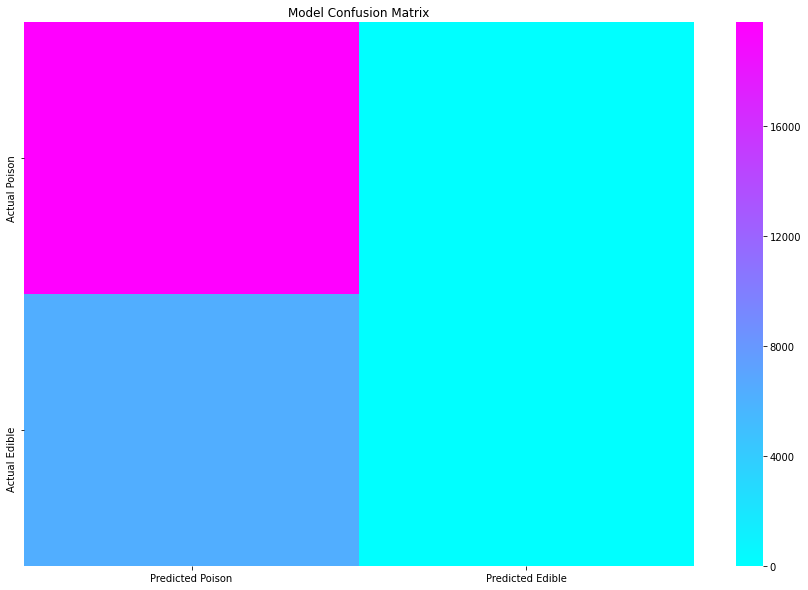

,Predicted Poison,Predicted Edible
Actual Poison,19775,0
Actual Edible,6273,0


In [39]:
model_analysis(tree, X_train, y_train)

In [40]:
tree_predictions = tree.predict(X_train)
accuracy_score(y_train, tree_predictions)

0.7591753685503686

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)
cv = cross_validate(estimator = random_forest, X = X_train, y = y_train, scoring='accuracy', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   30.5s remaining:   30.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   30.6s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.1s finished


In [42]:
random_forest.fit(X_test, y_test)
test_predictions = random_forest.predict(X_train)
accuracy_score(y_train, test_predictions)

0.7906557125307125

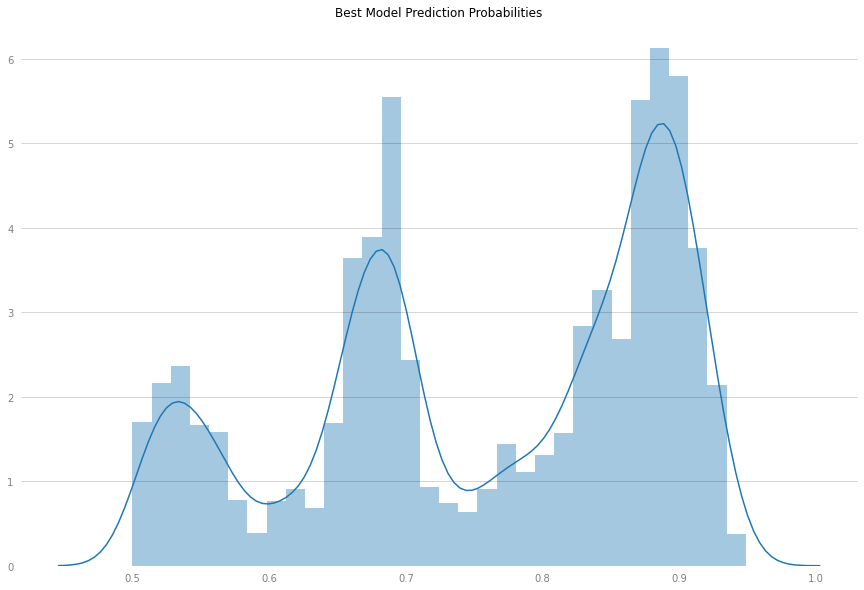



               precision    recall  f1-score   support

 0-Poisonous       0.79      0.99      0.88     19775
    1-Edible       0.84      0.16      0.27      6273

    accuracy                           0.79     26048
   macro avg       0.81      0.58      0.57     26048
weighted avg       0.80      0.79      0.73     26048



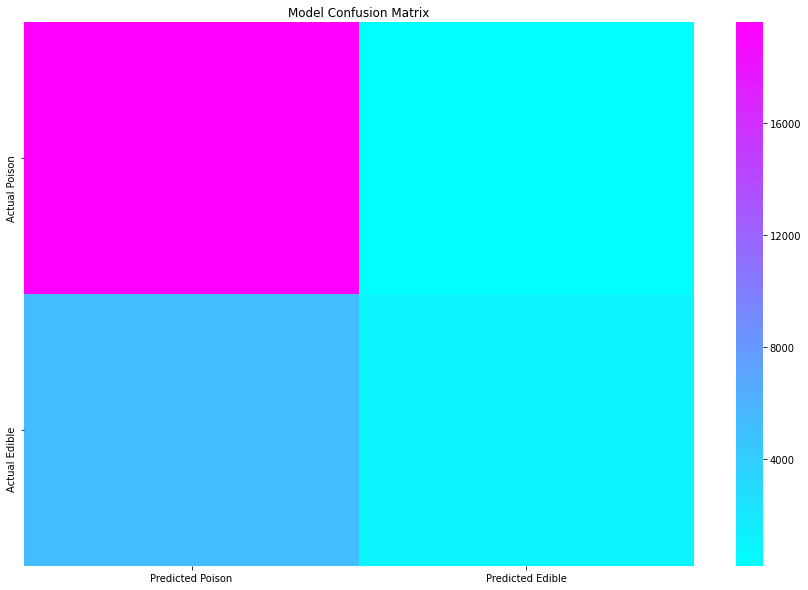

,Predicted Poison,Predicted Edible
Actual Poison,19579,196
Actual Edible,5257,1016


In [43]:
model_analysis(random_forest, X_train, y_train)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'max_depth':[1, 2, 3, 4, 5],
    'n_estimators': [10, 25, 50, 100, 150, 200]}
search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_distributions, n_iter=100, scoring='precision', n_jobs=-1, cv=10, verbose=10, return_train_score=True)
 
search.fit(X_train, y_train)

D:\spyder\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   return_train_score=True, scoring='precision', verbose=10)

In [45]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_depth=4, n_estimators=150)

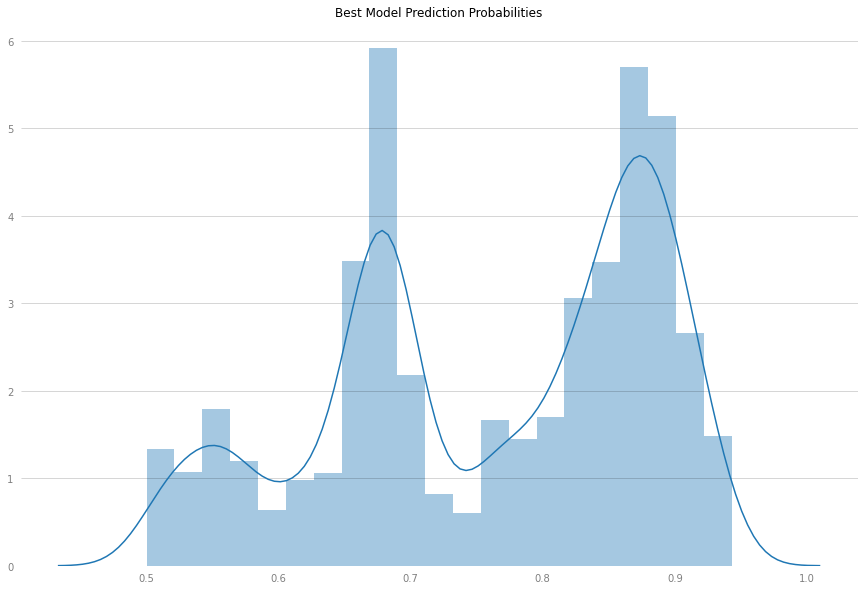



               precision    recall  f1-score   support

 0-Poisonous       0.77      1.00      0.87      4945
    1-Edible       0.91      0.03      0.06      1568

    accuracy                           0.77      6513
   macro avg       0.84      0.52      0.47      6513
weighted avg       0.80      0.77      0.67      6513



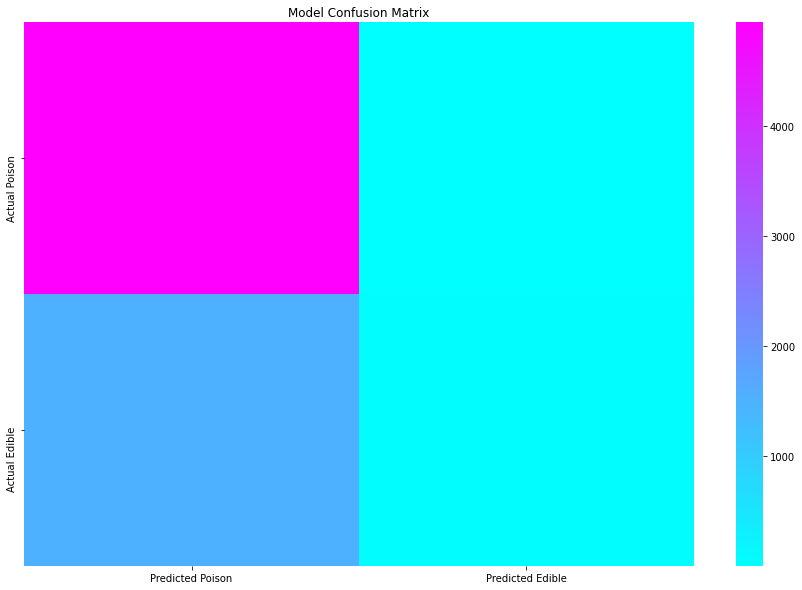

,Predicted Poison,Predicted Edible
Actual Poison,4940,5
Actual Edible,1516,52


In [46]:
model_analysis(best_model, X_test, y_test)

In [47]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_depth=4, n_estimators=150)

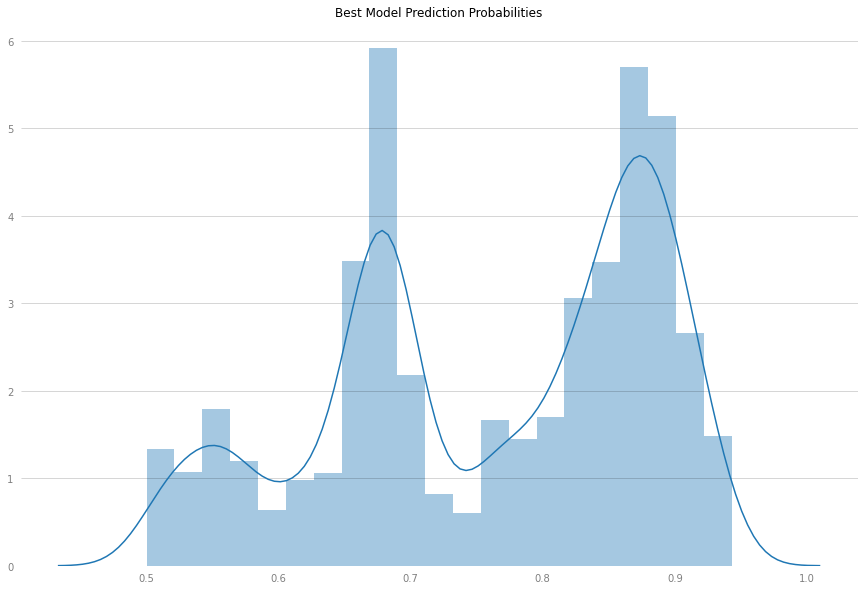



               precision    recall  f1-score   support

 0-Poisonous       0.77      1.00      0.87      4945
    1-Edible       0.91      0.03      0.06      1568

    accuracy                           0.77      6513
   macro avg       0.84      0.52      0.47      6513
weighted avg       0.80      0.77      0.67      6513



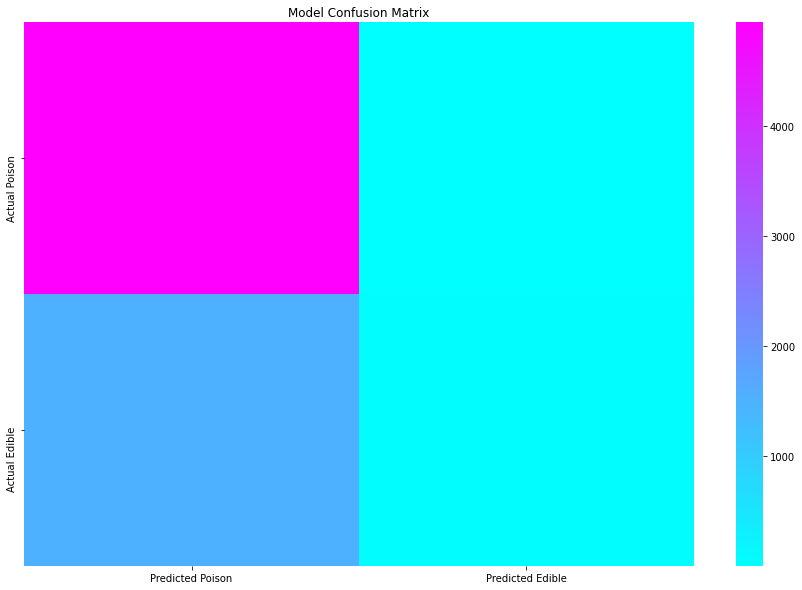

,Predicted Poison,Predicted Edible
Actual Poison,4940,5
Actual Edible,1516,52


In [48]:
model_analysis(best_model, X_test, y_test)